In [1]:
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_excel('Data_Train.xlsx')
df_test = pd.read_excel('Test_set.xlsx')

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# Preprocessing Training data 

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df_train.dropna(inplace = True)

In [8]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df_train.shape

(10682, 11)

In [10]:
# df_train.describe()

In [11]:
categorical_val = ['Airline','Source', 'Destination', 'Route','Total_Stops', 'Additional_Info'  ]

# Glance of Data Time Variable

In [12]:
date_time = ['Date_of_Journey','Dep_Time', 'Arrival_Time','Duration']

In [13]:
## Extract day, month and year from Date of Journey

In [14]:
df_train['Day_of_Journey'] = pd.to_datetime(df_train['Date_of_Journey'], format="%d/%m/%Y").dt.day

In [15]:
df_train['month_of_Journey'] = pd.to_datetime(df_train['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [16]:
df_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [17]:
# Drop date of journey 
df_train.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [18]:
## Extract dep/arrival hour and minutes 

In [19]:
df_train["Dep_hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour

In [20]:
df_train["Dep_min"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute

In [21]:
df_train.drop(["Dep_Time"], axis = 1, inplace = True)

In [22]:
df_train["Arrival_hour"] = pd.to_datetime(df_train["Arrival_Time"]).dt.hour

In [23]:
df_train["Arrival_minutes"] = pd.to_datetime(df_train["Arrival_Time"]).dt.minute

In [24]:
df_train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [25]:
df_train.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [26]:
duration = list(df_train['Duration'])

In [27]:
len(duration[0])

6

In [28]:
duration[2]

'19h'

In [29]:
duration[18]

'23h'

In [30]:
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 00m"
        else:
            duration[i]="00h "+duration[i]    

In [31]:
duration[2]

'19h 00m'

In [32]:
duration[18]

'23h 00m'

In [33]:
# Extract hours and minutes separatly

In [34]:
duration_hours = []
duration_minutes = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_minutes.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [35]:
df_train["Duration_hours"] = duration_hours
df_train["Duration_mins"] = duration_minutes

In [36]:
df_train.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [37]:
# Drop Duration column from dataset
df_train.drop(['Duration'], axis = 1, inplace = True)

In [38]:
df_train.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


# Glance of Ctegorical attributes

In [39]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

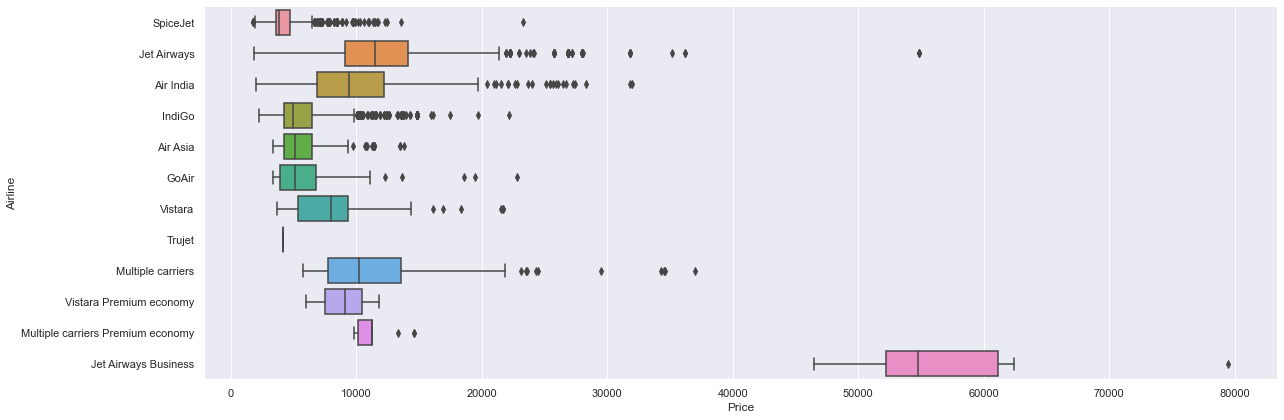

In [41]:
# Ailines Vs Price 
sns.catplot(y = "Airline", x = "Price",  data = df_train.sort_values("Price", ascending = True), 
            kind="box", height = 6, aspect = 3)
plt.show()

In [42]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df_train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [43]:
df_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

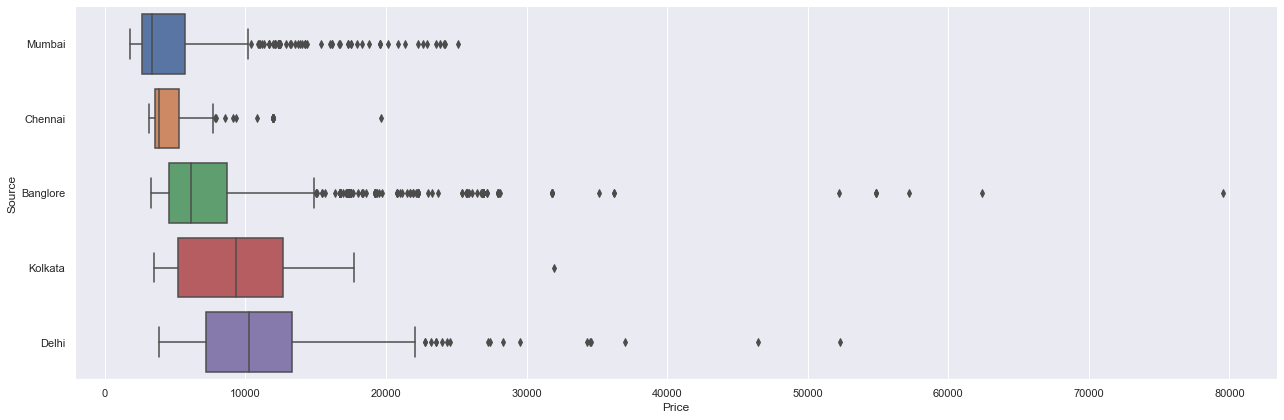

In [44]:
# Source Vs Price 
sns.catplot(y = "Source", x = "Price",  data = df_train.sort_values("Price", ascending = True), 
            kind="box", height = 6, aspect = 3)
plt.show()

In [45]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df_train[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [46]:
df_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

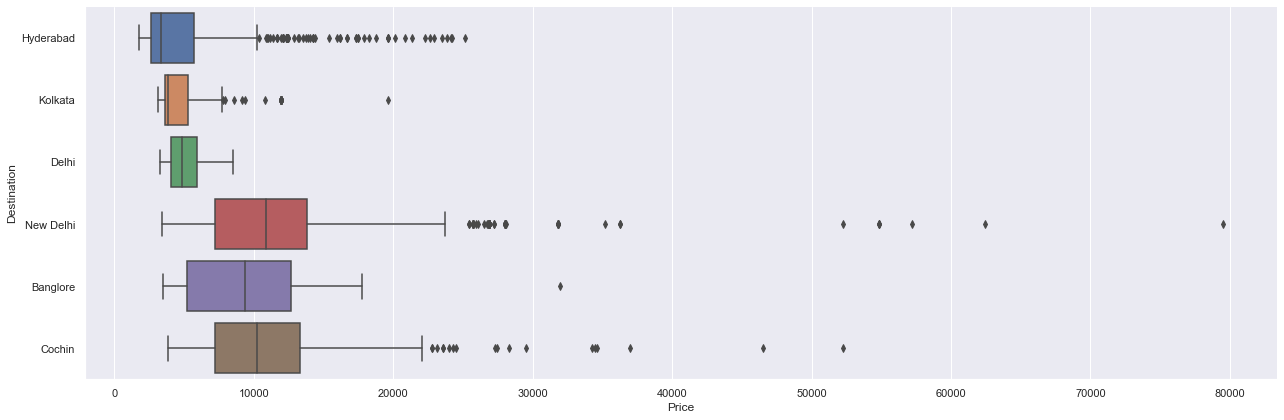

In [47]:
# Destination Vs Price 
sns.catplot(y = "Destination", x = "Price",  data = df_train.sort_values("Price", ascending = True), 
            kind="box", height = 6, aspect = 3)
plt.show()

In [48]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df_train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first= True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [49]:
df_train['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → VNS → DEL → HYD             1
CCU → RPR → HYD → BLR             1
BLR → HBX → BOM → AMD → DEL       1
BOM → CCU → HYD                   1
BOM → BLR → CCU → BBI → HYD       1
Name: Route, Length: 128, dtype: int64

In [50]:
df_train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [51]:
df_train.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

In [52]:
df_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [53]:
df_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [54]:
df_train['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [55]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [56]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

df_train = pd.concat([df_train, Airline, Source, Destination], axis = 1)

In [57]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [58]:
df_train.drop(['Airline','Source', 'Destination'], axis=1, inplace=True)

In [59]:
df_train.head()

,Total_Stops,Price,Day_of_Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [60]:
df_train.shape

(10682, 30)

## Preprocessing on Test Data

In [61]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [62]:
print("Test Data Information")
print("-"*100)
print(df_test.info())

Test Data Information
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB
None


In [63]:
print("Test data Null Treatment")
print("-"*100)
print(df_test.isnull().sum())
# print(df_test.dropna(inplace=True))
# print(df_test.isnull().sum())

Test data Null Treatment
----------------------------------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [64]:
# EDA of Test Data

df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [65]:
df_test['day_of_journey'] = pd.to_datetime(df_test['Date_of_Journey'], format="%d/%m/%Y").dt.day

In [66]:
df_test['month_of_journey'] = pd.to_datetime(df_test['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [67]:
df_test['year-of_journey'] = pd.to_datetime(df_test['Date_of_Journey'], format="%d/%m/%Y").dt.year

In [68]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day_of_journey,month_of_journey,year-of_journey
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,2019
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,2019
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019


In [69]:
df_test.drop(['Date_of_Journey'], axis=1, inplace=True)

In [70]:
# Extract hours and minutes from Arrival Time 

In [71]:
df_test['Arrival_hours'] =  pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_minutes'] = pd.to_datetime(df_test['Arrival_Time']).dt.month

In [72]:
df_test.drop(['Arrival_Time'], axis=1, inplace=True)

In [73]:
df_test.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,day_of_journey,month_of_journey,year-of_journey,Arrival_hours,Arrival_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,10h 55m,1 stop,No info,6,6,2019,4,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,4h,1 stop,No info,12,5,2019,10,11


In [74]:
# Extract hours and minutes from Dep_Time 

In [75]:
df_test['Dep_hour'] = pd.to_datetime(df_test['Dep_Time']).dt.hour

In [76]:
df_test['Dep_minutes'] = pd.to_datetime(df_test['Dep_Time']).dt.minute

In [77]:
df_test.drop(['Dep_Time'], axis=1, inplace=True)

In [78]:
df_test.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,day_of_journey,month_of_journey,year-of_journey,Arrival_hours,Arrival_minutes,Dep_hour,Dep_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,2019,4,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,2019,10,11,6,20


In [79]:
# Duration Treatment

In [80]:
duration = list(df_test['Duration'])

In [81]:
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip()+" 00m" #Concat 0 minutes
        else:
            duration[i]="00h "+ duration[i] # Concate 0 Hours

In [82]:
duration_hours = []
duration_minutes = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_minutes.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [83]:
df_test['Duration_hours'] = duration_hours
df_test['Duration_minutes'] = duration_minutes

In [84]:
df_test.drop(['Duration'], axis=1, inplace=True)

In [85]:
df_test.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,day_of_journey,month_of_journey,year-of_journey,Arrival_hours,Arrival_minutes,Dep_hour,Dep_minutes,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,2019,4,6,17,30,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,2019,10,11,6,20,4,0


In [86]:
# Categorical Data treatment

In [87]:
print("Airline")
print("-"*100)
print(df_test["Airline"].value_counts())

print()
print("hard Encoded Airline")
print("-"*100)

Airline = df_test[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

Airline
----------------------------------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

hard Encoded Airline
----------------------------------------------------------------------------------------------------


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [88]:
print("Source")
print("-"*100)
print(df_test["Source"].value_counts())

print()
print("hard Encoded Source")
print("-"*100)
Source = df_test[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

Source
----------------------------------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

hard Encoded Source
----------------------------------------------------------------------------------------------------


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [89]:
print("Destination")
print("-"*100)
print(df_test["Destination"].value_counts())

print()
print("hard Encoded Destination")
print("-"*100)
Destination = df_test[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first= True)
Destination.head()

Destination
----------------------------------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

hard Encoded Destination
----------------------------------------------------------------------------------------------------


,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [90]:
df_test.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,day_of_journey,month_of_journey,year-of_journey,Arrival_hours,Arrival_minutes,Dep_hour,Dep_minutes,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,2019,4,6,17,30,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,2019,10,11,6,20,4,0


In [91]:
df_test.drop(['Route','Additional_Info'], axis=1 ,inplace=True)

In [92]:
df_test.head(2)

,Airline,Source,Destination,Total_Stops,day_of_journey,month_of_journey,year-of_journey,Arrival_hours,Arrival_minutes,Dep_hour,Dep_minutes,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,1 stop,6,6,2019,4,6,17,30,10,55
1,IndiGo,Kolkata,Banglore,1 stop,12,5,2019,10,11,6,20,4,0


In [93]:
df_test['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [94]:
df_test.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4 }, inplace=True)

In [95]:
df_test['Total_Stops'].value_counts()

1    1431
0     849
2     379
3      11
4       1
Name: Total_Stops, dtype: int64

In [96]:
df_test = pd.concat([df_test, Airline, Source, Destination], axis=1)

In [97]:
df_test.head(2)

,Airline,Source,Destination,Total_Stops,day_of_journey,month_of_journey,year-of_journey,Arrival_hours,Arrival_minutes,Dep_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,2019,4,6,17,...,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,2019,10,11,6,...,0,0,0,1,0,0,0,0,0,0


In [98]:
df_test.drop(['Airline','Source', 'Destination'], axis=1, inplace=True)

In [99]:
df_test.head(2)

,Total_Stops,day_of_journey,month_of_journey,year-of_journey,Arrival_hours,Arrival_minutes,Dep_hour,Dep_minutes,Duration_hours,Duration_minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,2019,4,6,17,30,10,55,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,2019,10,11,6,20,4,0,...,0,0,0,1,0,0,0,0,0,0


In [100]:
df_test.shape

(2671, 29)

# Feature Selection 
***
    Heatmap
    feature_importance_ from ExtraTreesRegressor
***

In [101]:
df_train.shape

(10682, 30)

In [102]:
df_train.columns

Index(['Total_Stops', 'Price', 'Day_of_Journey', 'month_of_Journey',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_minutes',
       'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [104]:
X = df_train[['Total_Stops','Day_of_Journey', 'month_of_Journey',
       'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_minutes', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [105]:
X.head()

,Total_Stops,Day_of_Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [106]:
y = df_train[['Price']]
y.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


In [107]:
df_train_corr = df_train.corr()
df_train_corr

,Total_Stops,Price,Day_of_Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706,...,-0.020459,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.447390,-0.260752,-0.234758,-0.015302
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855,...,-0.000454,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777
Day_of_Journey,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940,...,-0.020115,0.006611,0.100088,-0.060558,-0.014030,0.100088,0.002632,-0.014030,0.006611,-0.075254
month_of_Journey,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897,...,-0.019797,0.005650,0.139222,0.087177,-0.039352,0.139222,0.090490,-0.039352,0.005650,-0.453685
Dep_hour,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707,...,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
Dep_min,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485,...,-0.011380,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129
Arrival_hour,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309,...,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366
Arrival_minutes,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628,...,0.000314,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271
Duration_hours,0.739916,0.508778,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468,...,-0.016268,-0.186668,0.299819,0.123524,-0.233326,0.299819,-0.346192,-0.233326,-0.186668,0.004052
Duration_mins,-0.136706,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000,...,0.004952,-0.098823,-0.154126,0.013761,-0.018761,-0.154126,0.218207,-0.018761,-0.098823,0.079866


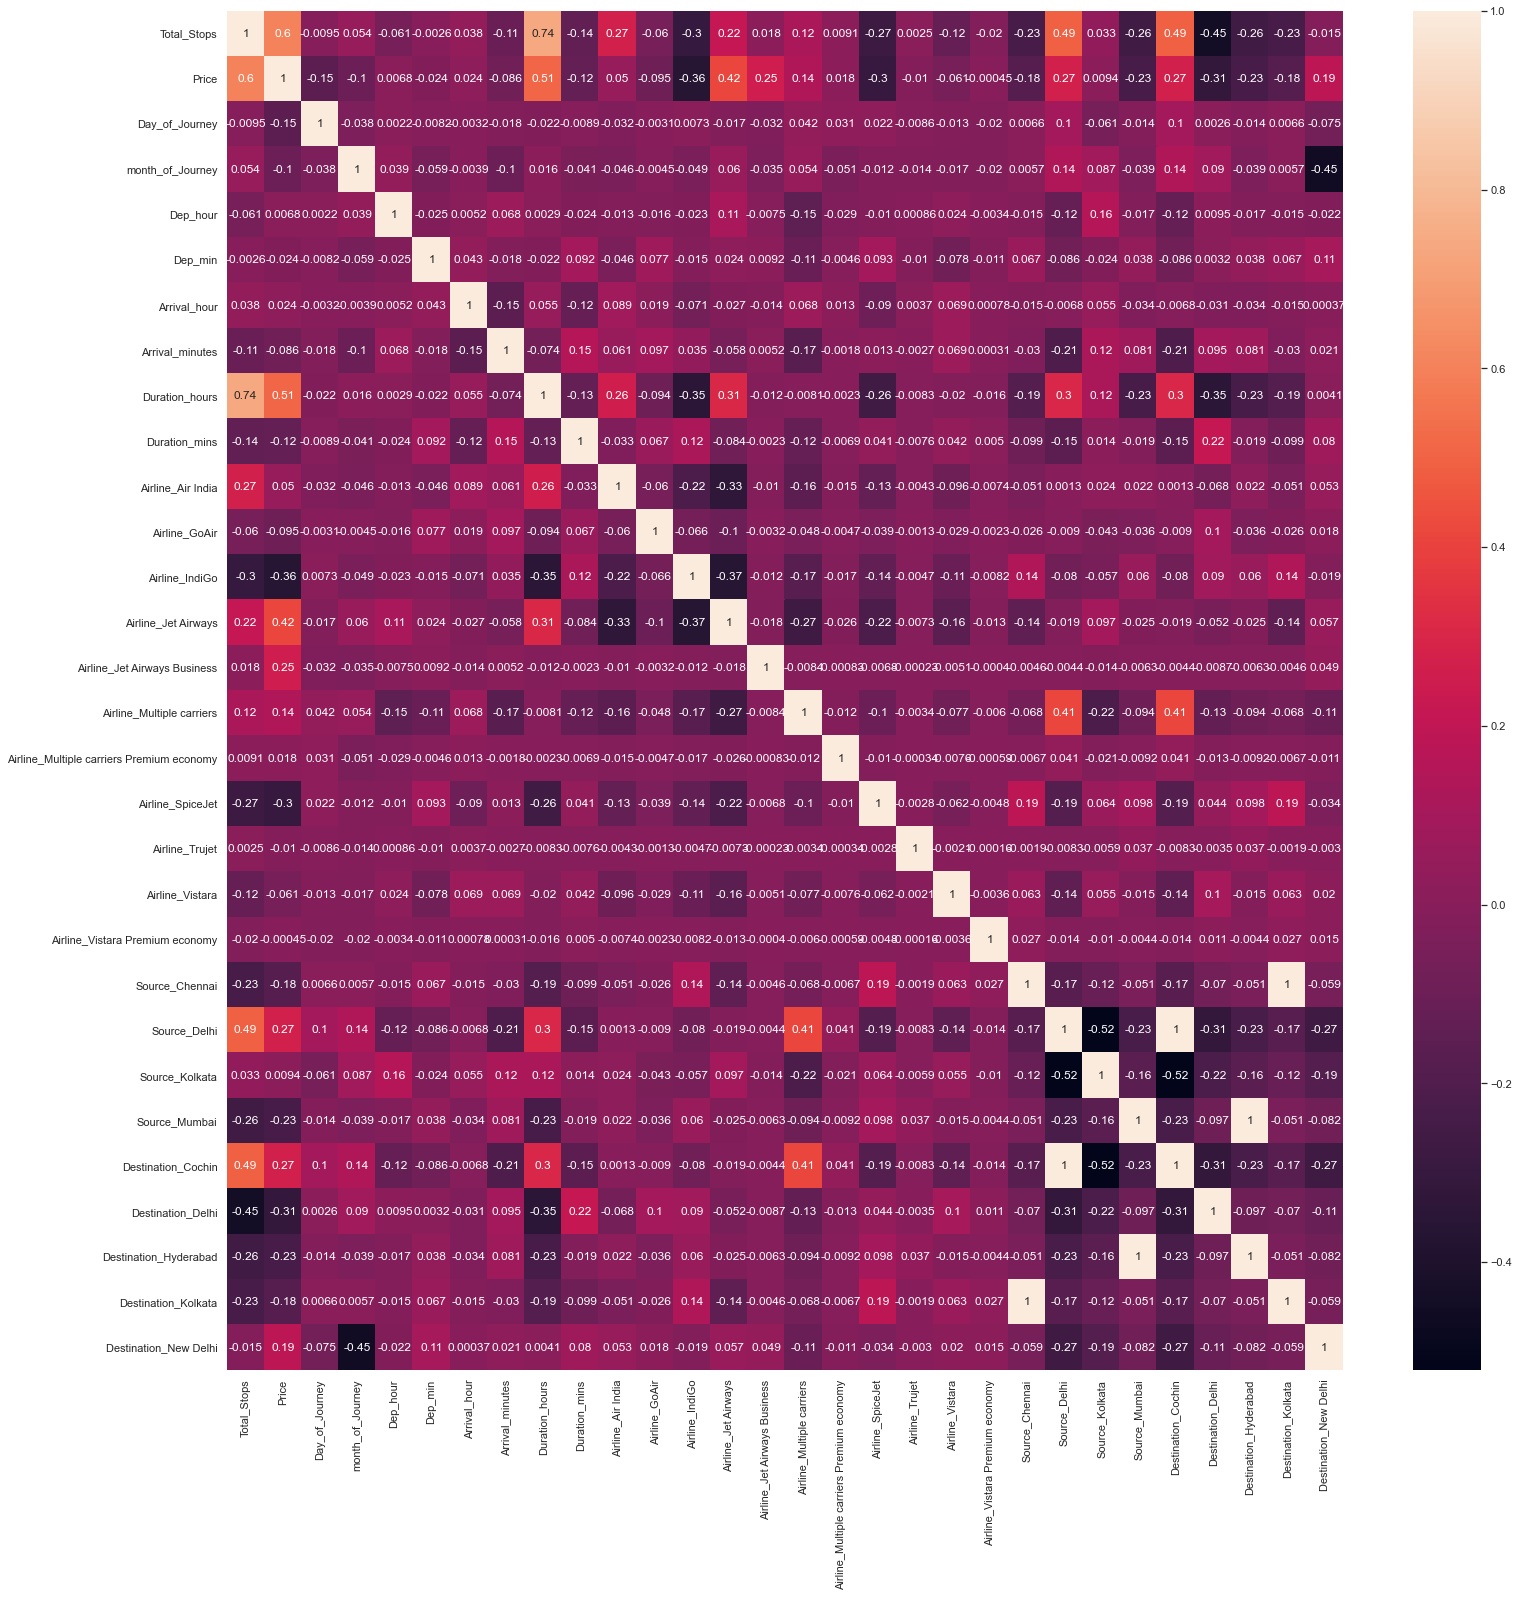

In [109]:
plt.figure(figsize=(25, 25))
sns.heatmap(df_train_corr, annot = True)
plt.show()

In [110]:
df_train.shape

(10682, 30)

In [111]:
# Important feature using ExtraTreesRegressor

In [112]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

<ipython-input-112-b5cac6a798fb>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(X, y)


ExtraTreesRegressor()

In [113]:
print(selection.feature_importances_)

[2.11041400e-01 1.43902606e-01 5.39913336e-02 2.43186347e-02
 2.08500816e-02 2.80286851e-02 1.88644820e-02 1.25575690e-01
 1.78695189e-02 1.09929650e-02 1.75557717e-03 1.82541383e-02
 1.45545594e-01 6.82231511e-02 1.99026251e-02 8.47825902e-04
 3.56860104e-03 9.28410568e-05 4.91399199e-03 8.81054339e-05
 4.57322797e-04 1.31910791e-02 3.40138437e-03 7.33105637e-03
 1.13406909e-02 1.44996757e-02 6.01941387e-03 4.93453686e-04
 2.46380742e-02]


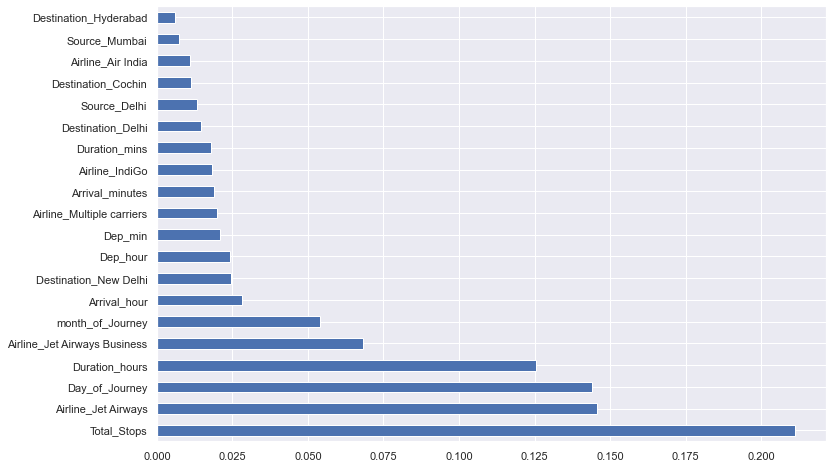

In [114]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting model using Random Forest

In [115]:
X.shape, y.shape

((10682, 29), (10682, 1))

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

In [117]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8545, 29), (2137, 29), (8545, 1), (2137, 1))

In [118]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [119]:
model.fit(X_train, y_train)

<ipython-input-119-d768f88d541e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor()

In [120]:
y_pred = model.predict(X_test)

In [121]:
model.score(X_train, y_train)

0.9530167763047463

In [122]:
model.score(X_test, y_test)

0.8334525817727079

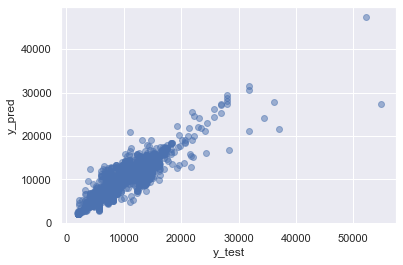

In [123]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [124]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1167.3550692108936
MSE: 3753976.7161702598
RMSE: 1937.5181847327935


In [125]:
metrics.r2_score(y_test, y_pred)

0.8334525817727079

In [126]:
# Save the model

In [127]:
import pickle

# Save the model
pickle.dump(model, open('model.pkl','wb'))

In [128]:
#Loading model to compare result
model = pickle.load(open('model.pkl','rb'))

In [129]:
y_predict = model.predict(X_test)

In [130]:
metrics.r2_score(y_test, y_predict)

0.8334525817727079

In [131]:
X.shape

(10682, 29)